# Medical Dataset - Segmenting Patients

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
df=pd.read_csv('patient_dataset.csv')
df.head()

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status
0,24,1.0,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1,Urban,Smoker
1,29,0.0,4,132,187,147,0,202.0,42.0,NaN,25.588346,0.283986,1,1,Urban,Unknown
2,46,0.0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0,Rural,Non-Smoker
3,73,NaN,2,102,200,125,0,105.0,77.0,165.0,18.660241,1.472052,0,1,Rural,Smoker
4,49,1.0,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1,Rural,Smoker


## Defining Problem Statement and perform Exploratory Data Analysis

### Observations on the data types of all the attributes

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                6000 non-null   int64  
 1   gender             5528 non-null   float64
 2   chest_pain_type    6000 non-null   int64  
 3   blood_pressure     6000 non-null   int64  
 4   cholesterol        6000 non-null   int64  
 5   max_heart_rate     6000 non-null   int64  
 6   exercise_angina    6000 non-null   int64  
 7   plasma_glucose     5391 non-null   float64
 8   skin_thickness     5386 non-null   float64
 9   insulin            5432 non-null   float64
 10  bmi                6000 non-null   float64
 11  diabetes_pedigree  6000 non-null   float64
 12  hypertension       6000 non-null   int64  
 13  heart_disease      6000 non-null   int64  
 14  residence_type     5545 non-null   object 
 15  smoking_status     6000 non-null   object 
dtypes: float64(6), int64(8),

###  Missing value check

In [161]:
print('Missing Values in the dataset ')
df.isna().sum()

Missing Values in the dataset 


age                    0
gender               472
chest_pain_type        0
blood_pressure         0
cholesterol            0
max_heart_rate         0
exercise_angina        0
plasma_glucose       609
skin_thickness       614
insulin              568
bmi                    0
diabetes_pedigree      0
hypertension           0
heart_disease          0
residence_type       455
smoking_status         0
dtype: int64

In [162]:
print("Total Missing Values ")
df.isna().sum().sum()


Total Missing Values 


2718

### Outlier detection

In [163]:
# Extracting Numerical data from the pool
numeric_data=df.select_dtypes('number')
numeric_data.head(5)

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease
0,24,1.0,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1
1,29,0.0,4,132,187,147,0,202.0,42.0,NaN,25.588346,0.283986,1,1
2,46,0.0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0
3,73,NaN,2,102,200,125,0,105.0,77.0,165.0,18.660241,1.472052,0,1
4,49,1.0,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1


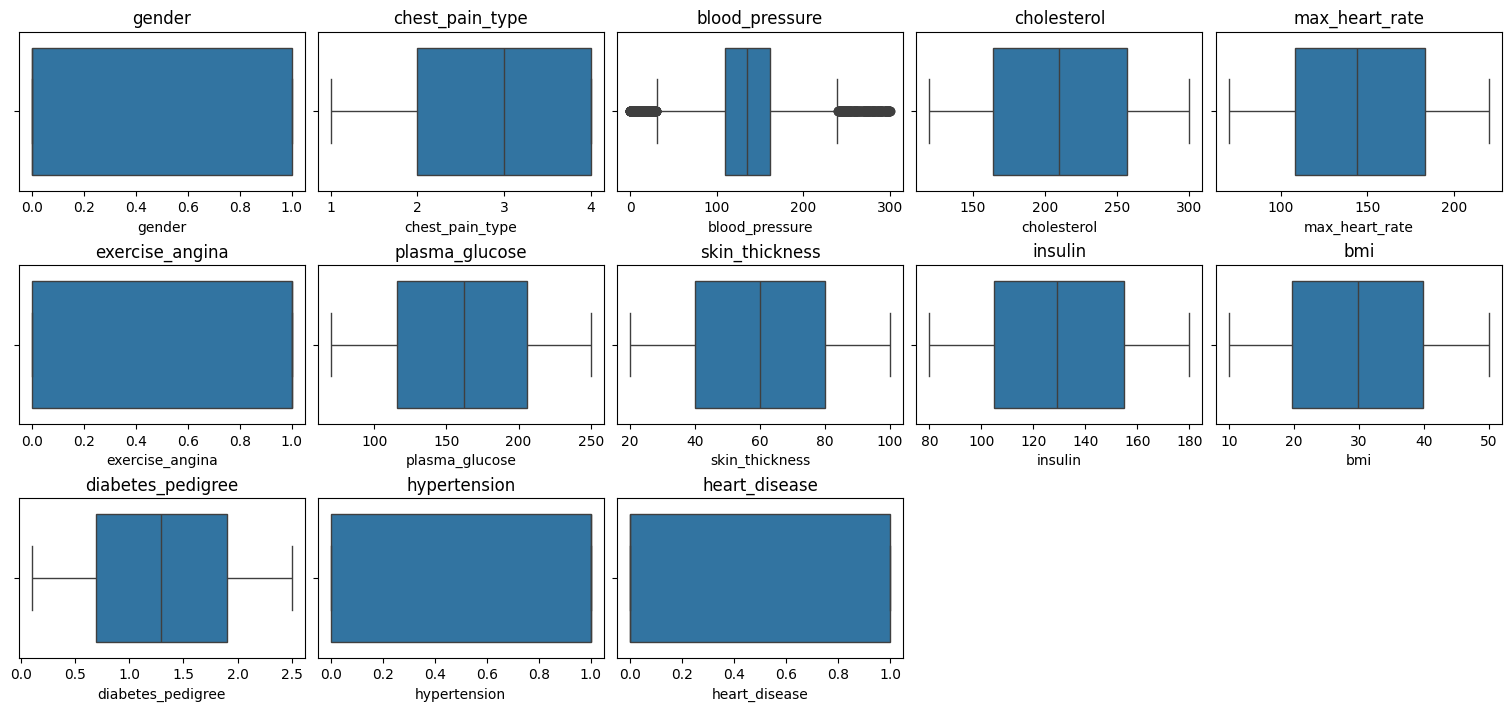

In [164]:
plt.figure(figsize=(15, 7), layout="constrained")
i=1
for plot in range(0,numeric_data.shape[1]-1):
    plt.subplot(3,5,i)    
    sns.boxplot(x=numeric_data.columns[i], data=numeric_data)
    plt.title(numeric_data.columns[i])
    
    i+=1
plt.show()

#### Only found outliers in blood_preassure

---------------
-----------------

---------------------

## Data Preprocessing

### Imputation

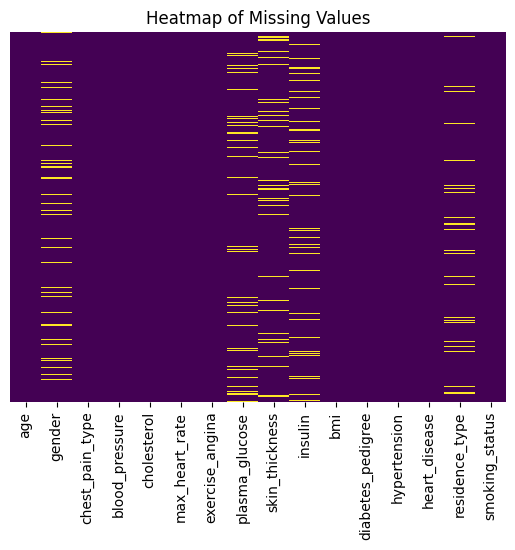

In [165]:
# Handling Missing values 
missing_values_data=df.isna().sum()[df.isna().sum()>0]

sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()

In [166]:
#Calculating the percentage of missing values
missing_percentage = round((missing_values_data / len(df)) * 100, 2)

missing_data_summary = pd.DataFrame(
    {
        "Missing Values": missing_values_data[missing_values_data > 0],
        "Percentage (%)": missing_percentage[missing_values_data > 0],
    }
).sort_values(by="Percentage (%)", ascending=False)

print(missing_data_summary)


                Missing Values  Percentage (%)
skin_thickness             614           10.23
plasma_glucose             609           10.15
insulin                    568            9.47
gender                     472            7.87
residence_type             455            7.58


---------

In [167]:
# Handeling skin_thikness

# Filled with average value of the column
df['skin_thickness']=df['skin_thickness'].fillna(df['skin_thickness'].mean())

--------------

In [168]:
# Handling plasma_glucose
# Filled with average value of the column
df["plasma_glucose"] = df["plasma_glucose"].fillna(df["plasma_glucose"].mean())

--------------

In [169]:
# Handling insulin
# Filled with average value of the column
df["insulin"] = df["insulin"].fillna(df["insulin"].mean())

-----------------

In [170]:
# Handling 'Gender' 
df['gender'].nunique()

2

In [171]:
# since their are only 2 types of gender present in the dataset 
# the null values can be filled with the mode
df['gender']=df['gender'].fillna(df['gender'].mode()[0])

-------------

In [172]:
# Handling residence_type
df['residence_type'].nunique()

2

In [173]:
# Null values filled with mode
# since their are only 2 types of gender present in the dataset
df["residence_type"] = df["residence_type"].fillna("unknown")

In [174]:
df.isnull().sum()

age                  0
gender               0
chest_pain_type      0
blood_pressure       0
cholesterol          0
max_heart_rate       0
exercise_angina      0
plasma_glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
residence_type       0
smoking_status       0
dtype: int64

----------------------

-------------------------

### Outlier Treatment

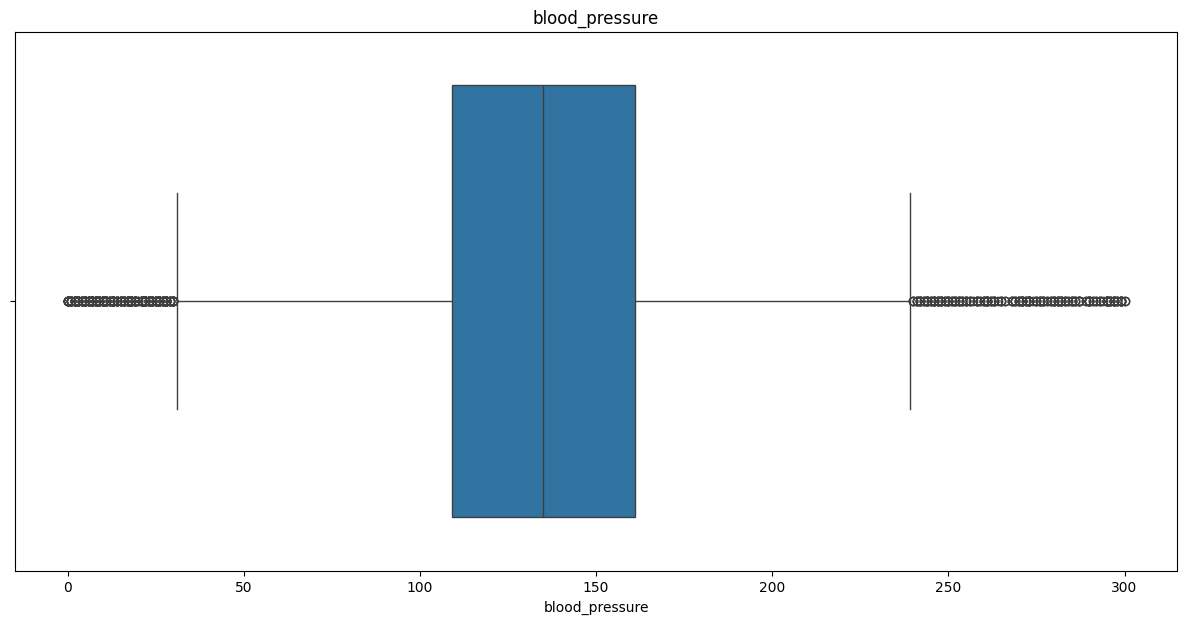

In [175]:
plt.figure(figsize=(15, 7))
sns.boxplot(x=df['blood_pressure'], data=df)
plt.title("blood_pressure")
plt.show()

In [176]:
# funcion to calculate lower bound & upper bound of a feature
def detect_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1    
    lower_bound = Q1 - 1.5 * IQR    
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound,upper_bound

In [177]:
outliers, lower, upper = detect_outliers_iqr('blood_pressure')
len(outliers), lower, upper

(498, 31.0, 239.0)

In [ ]:
# Cap the outliers
df["blood_pressure"] = np.where(
    df["blood_pressure"] < lower, lower, df["blood_pressure"]
)
df["blood_pressure"] = np.where(
    df["blood_pressure"] > upper, upper, df["blood_pressure"]
)

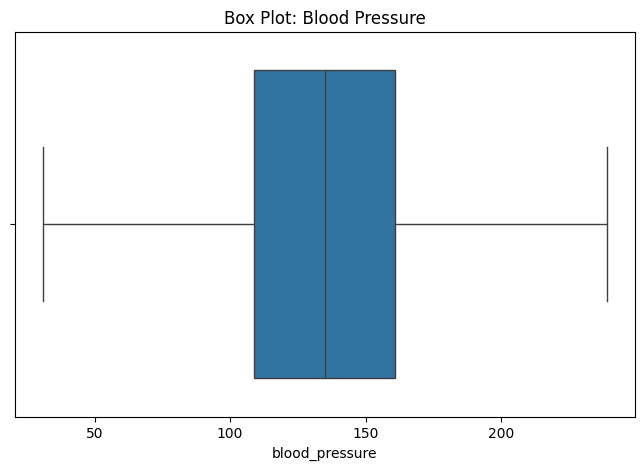

In [148]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["blood_pressure"])
plt.title("Box Plot: Blood Pressure")
plt.show()


--------------
-----------------

### Encoding all the categorical attributes

In [149]:
categorical_data=df.select_dtypes("object")
categorical_data.head(5)

,residence_type,smoking_status
0,Urban,Smoker
1,Urban,Unknown
2,Rural,Non-Smoker
3,Rural,Smoker
4,Rural,Smoker


In [150]:
# Encoding residence_type

df['residence_type'].value_counts().index

Index(['Urban', 'Rural', 'unknown'], dtype='object', name='residence_type')

In [158]:
residence_type_map = {"Urban": 0, "Rural": 1, "unknown": 2}

df['residence_type']=df['residence_type'].map(residence_type_map)

df['residence_type']

0       0
1       0
2       1
3       1
4       1
       ..
5995    1
5996    0
5997    0
5998    0
5999    2
Name: residence_type, Length: 6000, dtype: int64

In [152]:
# Encoding smoking_status

df["smoking_status"].value_counts().index

Index(['Smoker', 'Non-Smoker', 'Unknown'], dtype='object', name='smoking_status')

In [153]:
smoking_status = {'Smoker':1, 'Non-Smoker':2, 'Unknown':3}

df["smoking_status"] = df["smoking_status"].map(smoking_status)

df["smoking_status"]

0       1
1       3
2       2
3       1
4       1
       ..
5995    2
5996    2
5997    2
5998    2
5999    2
Name: smoking_status, Length: 6000, dtype: int64

### Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

df[df.columns] = scaler.fit_transform(df)
df

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status
0,-1.411160,1.086750,1.318087,2.420060,-1.340840,1.537505,-1.006354,-1.068852,-1.223471,-0.741370,0.693118,-1.180427,0.997337,1.003673,-0.982661,-0.977989
1,-1.173253,-0.920175,1.318087,-0.044672,-0.432369,0.045985,-1.006354,0.822578,-0.815114,0.000000,-0.374450,-1.464958,0.997337,1.003673,-0.982661,2.202463
2,-0.364370,-0.920175,0.428390,2.420060,-0.470222,1.101522,-1.006354,-0.243867,-0.769741,-0.993277,0.683890,1.707102,0.997337,-0.996340,0.620811,0.612237
3,0.920327,-0.920175,-0.461308,-0.735719,-0.186325,-0.458838,-1.006354,-1.129217,0.772942,1.273883,-0.970392,0.257191,-1.002670,1.003673,0.620811,-0.977989
4,-0.221626,1.086750,0.428390,-0.989103,-0.886605,1.078576,-1.006354,0.017714,-1.314217,1.453816,-1.477234,-1.097297,0.997337,1.003673,0.620811,-0.977989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.063071,1.086750,-1.351006,-0.390196,0.703220,-1.307857,0.993687,-1.149339,-1.722575,1.777696,1.074011,1.047984,0.997337,-0.996340,0.620811,0.612237
5996,-0.126463,1.086750,-0.461308,0.899758,1.649544,-1.468482,-1.006354,0.943308,0.636823,-1.713010,-0.503029,-0.025956,-1.002670,1.003673,-0.982661,0.612237
5997,0.777583,-0.920175,-0.461308,-0.321091,0.457175,-0.780088,-1.006354,-0.445083,-0.678995,-1.569064,0.906843,-0.940173,-1.002670,1.003673,-0.982661,0.612237
5998,1.158234,-0.920175,-0.461308,-0.067707,-0.394516,-0.275266,0.993687,0.701849,1.045180,0.734083,-0.426170,-0.834250,0.997337,-0.996340,-0.982661,0.612237


## Exploratory Data Analysis (EDA)

###  Correlation between all the attributes

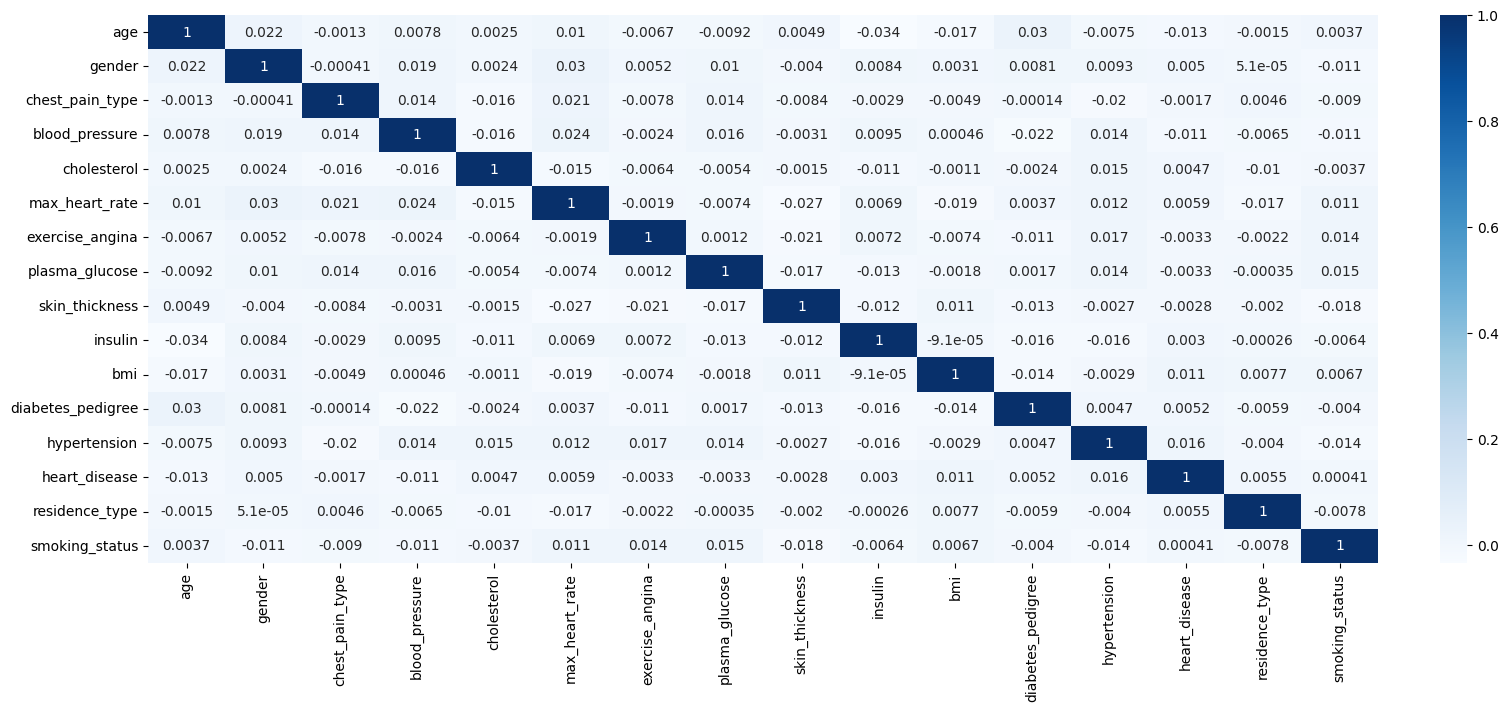

In [187]:
plt.figure(figsize=(15, 7), layout="constrained")
sns.heatmap(data=df.corr(), annot=True, cmap='Blues')
plt.show()

###  Relationship between important variables

### Illustrate the insights based on EDA

## Model Training

### K-Means Clustering

###  Gaussian Mixture Model

### Hierarchical Clustering

### How can hyperparameter tuning be performed to optimize the performance of clustering algorithms?

### Compare the clustering results of all the algorithms using Inertia and the Silhouette Score.


### Visualize the clusters formed using T-SNE for all the three algorithms.

## Expected Insights


### Identification of distinct patient groups based on health and lifestyle attributes.

### Understanding whether certain clusters correspond to high-risk vs. low-risk patients.

### Comparison of clustering algorithms to determine which provides the most meaningful segmentation.